In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/AdvertisingCleaned"
AdData = pd.read_csv(url)
AdData.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
del AdData['Unnamed: 0']

#### AdData is an outlier free dataset. 
sales in thousands of units

budgets in thousands of dollars (For instance TV =5 means 5000 dollars budget in TV ads)

200 different markets. After removing outliers we are left with 198 observations.

In [3]:
AdData.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

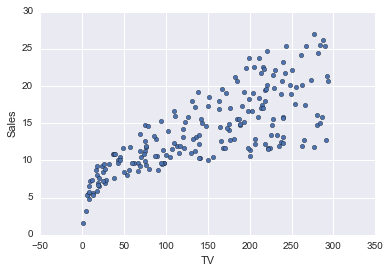

In [5]:
AdData.plot(kind= 'scatter', x = 'TV',y = 'Sales')

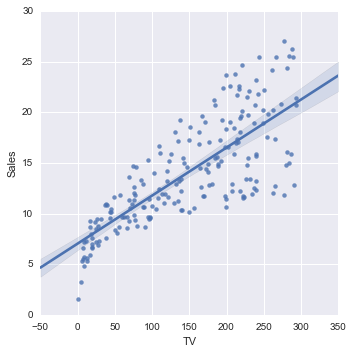

In [6]:
sns.lmplot(x = 'TV', y = 'Sales', data = AdData)

In the diagram above:

- The blue dots are the **Observed Values**
- The blue line is your one-variable regression line
- The shaded area around your regression line is your confidence interval for mean of values. 

## Now let's build a regression line (Import, Instantiate, Fit)

In [7]:
from sklearn.linear_model import LinearRegression  #import

In [8]:
linreg = LinearRegression() #Instantiate

#### Create X (your inputs) and Y ( your output)

Let's investigate the relationship between TV (input) and Sales (output)

In [9]:
X = AdData[['TV']]
y= AdData['Sales']

In [10]:
linreg.fit(X,y)     #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Let's print intercept and slope
print(linreg.intercept_)
print(linreg.coef_)

7.0305614564
[ 0.04738103]


Our Linear Regression Line is:
Sales_hat = 7.03056 + 0.04738 * TV

In other words, for the data we had on hand - everything else fixed - for every thousand dollars spent in TV ads, Sales increased by 47 units. Be careful, this does not necessarily mean causation! 

# now let's use our linear model to make predictions. 

First, be very careful! Most of the models are only capable to be used for prediction within the range of data you trained your algorithms by. Let's explore min and max of TV data. 

In [12]:
AdData['TV'].describe()

count    198.000000
mean     146.688384
std       85.443221
min        0.700000
25%       74.800000
50%      149.750000
75%      218.475000
max      293.600000
Name: TV, dtype: float64

Based on the above summary - we can solely make predictions within the range of our available data. For instance, the lowest amount of expenditure in TV ads has been (.7) 700 dollars and the highest figure is (293.6) 293600 dollars. We may be able to predict slightly below or above the range, but it is not a good idea to make predictions for values so much below or above your available data. This is called extrapolation.  

Let's predict how much is the average Sales of a company that spends 100,000 dollars in TV ads. 

In [13]:
print(linreg.predict(100))

[ 11.76866439]


Besed on our model, such a company sells on average 11768 (11769) units.

#### Now let's use Radio and TV as input variables. 

In [14]:
X = AdData[['TV','Radio']]
y= AdData['Sales']
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

2.93147585094
[ 0.04568137  0.18799199]


Our linear regression model is:

Sales_hat = 2.93147 + 0.045681*TV + 0.18799*Radio

In our data set - keeping everything else fixed - every 1000 dollars expenditure on TV ads on average contributed to 45.68 units of Sales and every 1000 dollars expenditure on Radio, contributed 188 units to Sales. Does it mean Radio ads contribute to Sales more than TV ads? (DON'T JUMP INTO CONCLUSIONS THAT FAST)

Again, please be careful, we are not suggesting causation. Moreover, we assumed everything is fixed when interpreted TV and Radio ads. In reality, companies who spend on TV ads tend to also spend on other means of ad. 

In [15]:
AdData['Radio'].describe() #Let's explore Radio Data

count    198.000000
mean      23.130808
std       14.862111
min        0.000000
25%        9.925000
50%       22.400000
75%       36.325000
max       49.600000
Name: Radio, dtype: float64

First of all, we just observed that in comparison to TV ads, only little has been spent on Radio ads. Median expenditure on TV ads is 7 times more than Radio ads. Second, may be only those companies who spend a lot in TV are interested in spending money in Radio ads. Let's explore it with a scatterplot. 

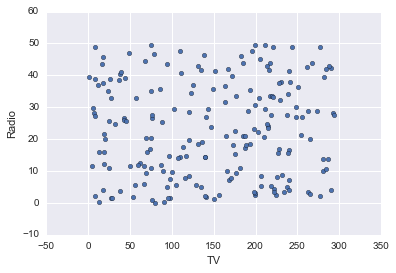

In [16]:
AdData.plot(kind= 'scatter', x = 'TV',y = 'Radio')

Fortunately, the scatter plot does not suggest that much of association between TV ads and Radio ads. That's good! Actually, corr() matrix suggested that there were no linear relationship. 

So, how can we interpret the result?

May be there is synergy between TV and Radio. In other words, may be, Radio ads are effective only if we have spent enough in TV and visa-versa. In marketing, it is being said that an ad is effective if a potential customer is exposed to it at least 5 times. So, synergy effect is yet to be tested! This is what we are going to explore next session. Also, may be the types of businesses who spend money on TV are completely different from those who spend money on Radio ads.

#### What is your prediction for a company that has spent 150000 dollars on TV ads and 30000 on Radio ads?


In [17]:
print(linreg.predict([150,30]))  #we predict 15423 units

[ 15.42344028]


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


** This was just a demo. Very important assumptions were not checked in this study. For example we did not check p-values, significancy of variables, Error, and confidence interval of our predictions and coefficients. We also did not check synergy effects. All of these very important topics will be covered in future lectures. **